In [14]:
from nbreversible import code
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.tsa.seasonal as seasonal
%matplotlib inline

# monkeypatch
from scipy.special import factorial
from scipy.special import  logsumexp
from scipy.special import comb
import scipy.misc
scipy.misc.factorial = factorial
scipy.misc.logsumexp = logsumexp
scipy.misc.comb = comb

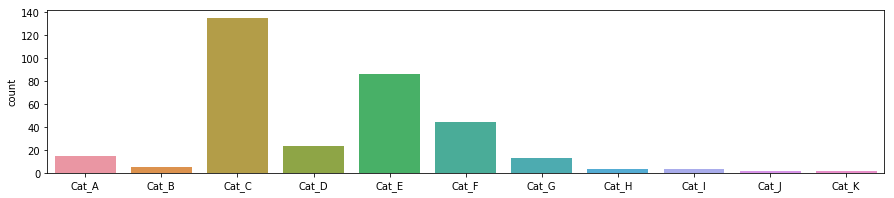

In [15]:
A = np.repeat('Cat_A', 15)
B = np.repeat('Cat_B', 5)
C = np.repeat('Cat_C', 135)
D = np.repeat('Cat_D', 23)
E = np.repeat('Cat_E', 86)
F = np.repeat('Cat_F', 44)
G = np.repeat('Cat_G', 13)
H = np.repeat('Cat_H', 3)
I = np.repeat('Cat_I', 3)
J = np.repeat('Cat_J', 2)
K = np.repeat('Cat_K', 2)
data = np.concatenate((A, B, C, D, E, F, G, H, I, J, K))
data = pd.Series(data)
# シンプルに集計し、可視化
plt.figure(figsize=(15, 3))
sns.countplot(data)

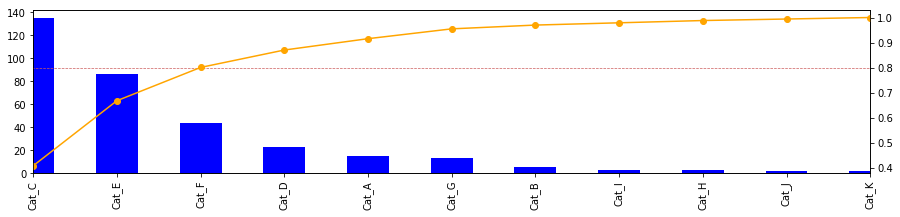

In [16]:
t = data.value_counts()# カテゴリ毎の合計
r = t/t.sum()# 割合に変換
r_ = r.cumsum()# 累積割合に変換
# 上記で集計したカテゴリ枚の合計（t）と累積割合（r_）を可視化
# 全体構成80%のボーダーライン
fig, ax1 = plt.subplots()
t.plot.bar(figsize=(15, 3), color='blue', ax=ax1)
ax2 = ax1.twinx()
r_.plot(figsize=(15, 3), color='orange', ax=ax2, marker='o')
plt.hlines(y=0.8, xmin=-1, xmax=len(t), lw=.7, color='indianred', linestyle='--')

Text(0.5,1,'x: RM, y: Price')

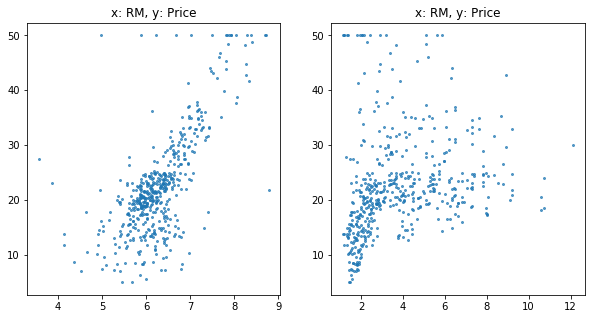

In [17]:
# sklearnのボストン住宅価格のデータを利用
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
# y(住宅価格)を予測する変数としてRM（部屋数）とDIS（職業訓練施設からの距離）を利用
y = boston.target
x1 = data[:, 5]#RM
x2 = data[:, 7]#DIS

# 各xとyの関係性を可視化
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(x1, y, s=4, alpha=.7)
plt.title('x: RM, y: Price')
plt.subplot(122)
plt.scatter(x2, y, s=4, alpha=.7)
plt.title('x: RM, y: Price')

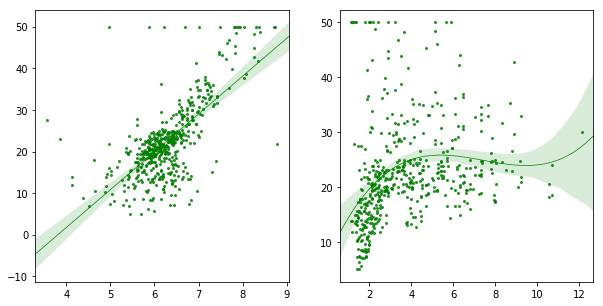

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.regplot(x=x1, y=y, ci=95, order=1,
            line_kws={"linewidth": .7}, scatter_kws={'s': 4}, color='green')
plt.subplot(122)
sns.regplot(x=x2, y=y, ci=95, order=3,
            line_kws={"linewidth": .7}, scatter_kws={'s': 4}, color='green')

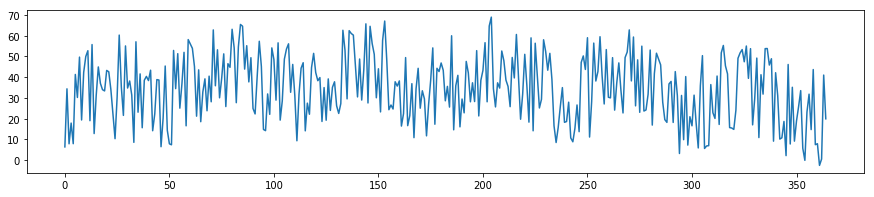

In [19]:
# 適当なノイズを加えた時系列データを作成
x = np.arange(0, 365)
y1 = np.sin(0.1*x)*5
y2 = np.sin(1*x)+5
y3 = np.sin(0.01*x)*10
n = np.random.rand(len(x))*50
y = y1 + y2  + y3+ n
# 時系列データの可視化
plt.figure(figsize=(15, 3))
plt.plot(y)

In [20]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(y, freq=90)
# freq(feaquency)はデータ特性から任意に指定
res

Text(0.5,1,'residual')

<Figure size 432x288 with 0 Axes>

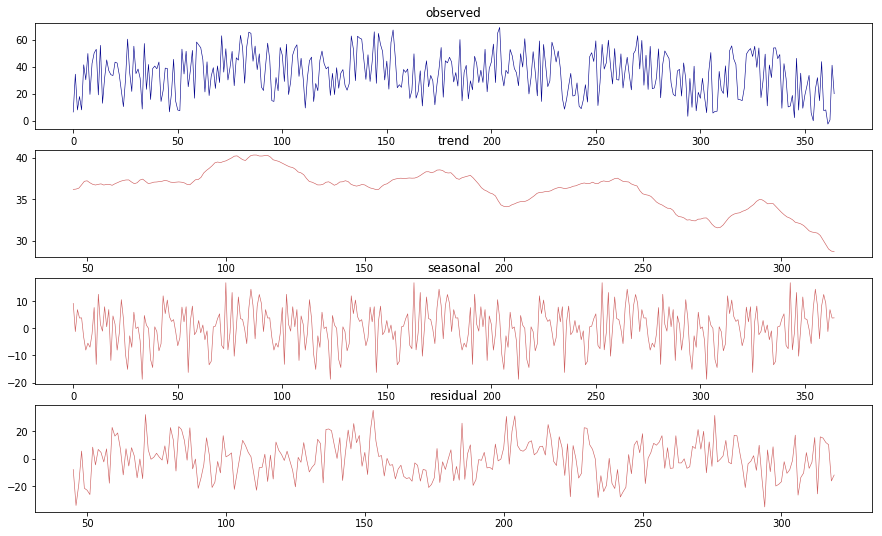

In [21]:
plt.subplots_adjust(hspace=0.3)
plt.figure(figsize=(15, 9))
plt.subplot(411)
plt.plot(res.observed, lw=.6, c='darkblue')
plt.title('observed')
plt.subplot(412)
plt.plot(res.trend, lw=.6, c='indianred')
plt.title('trend')
plt.subplot(413)
plt.plot(res.seasonal, lw=.6, c='indianred')
plt.title('seasonal')
plt.subplot(414)
plt.plot(res.resid, lw=.6, c='indianred')
plt.title('residual')

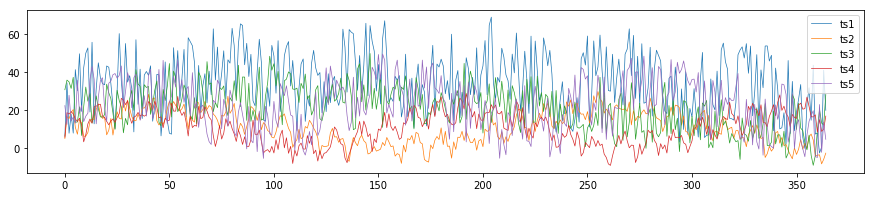

In [22]:
ts1 = y# ↑で生成した時系列データの再利用

y1 = np.sin(0.5*x)*5
y2 = np.sin(1.8*x)+5
y3 = np.sin(0.03*x)*10
n = np.random.rand(len(x))*10
ts2 = y1 + y2  + y3+ n

y1 = np.sin(0.4*x)*5
y2 = np.sin(1.3*x)+5
y3 = np.sin(0.013*x)*10
n = np.random.rand(len(x))*30
ts3 = y1 + y2  + y3+ n

y1 = np.sin(0.5*x)*5
y2 = np.sin(1.9*x)+5
y3 = np.sin(0.041*x)*10
n = np.random.rand(len(x))*10
ts4 = y1 + y2  + y3+ n

y1 = np.sin(0.26*x)*5
y2 = np.sin(1.38*x)+5
y3 = np.sin(0.05*x)*10
n = np.random.rand(len(x))*35
ts5 = y1 + y2  + y3+ n

# 5つの時系列データを可視化
plt.figure(figsize=(15, 3))
plt.plot(ts1, label='ts1', lw=.7)
plt.plot(ts2, label='ts2', lw=.7)
plt.plot(ts3, label='ts3', lw=.7)
plt.plot(ts4, label='ts4', lw=.7)
plt.plot(ts5, label='ts5', lw=.7)
plt.legend()

Text(0.5,1,'Time series Correlation matrix')

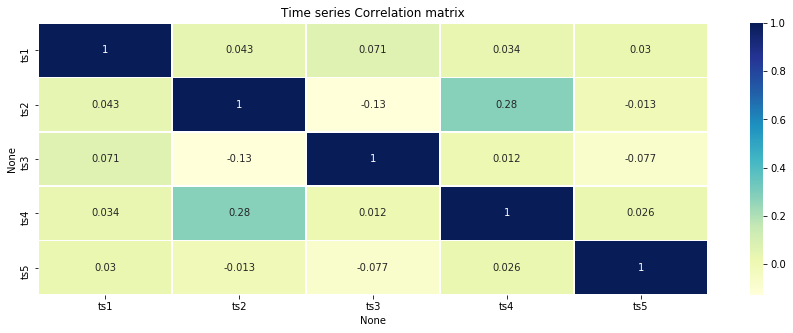

In [23]:
resid_mat = pd.DataFrame()
for ts in[ts1, ts2, ts3, ts4, ts5]:
    res = seasonal.seasonal_decompose(ts, freq=90)
    resid_mat = pd.concat([resid_mat, pd.Series(res.resid)], axis=1)

resid_mat.columns =[['ts1', 'ts2', 'ts3', 'ts4', 'ts5']]

plt.figure(figsize=(15, 5))
sns.heatmap(resid_mat.corr(), annot=True, lw=0.7, cmap='YlGnBu')
plt.title('Time series Correlation matrix')

In [24]:
from sklearn.datasets import load_iris
# Pandas のデータフレームとして表示
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
x = iris.data
y = iris.target

# 単純なirisデータのままだと面白くないので、特徴量にランダムの数値とカテゴリデータを追加
rand_num = np.random.rand(x.shape[0])
rand_num = rand_num.reshape(-1, 1)#axis=1に結合するため、次元を指定

rand_cat = (np.random.rand(x.shape[0])>0.5).astype(str)
rand_cat = pd.get_dummies(rand_cat).values#pd.get_dummiesでダミー変数へ変換し、valuesでnumpy形式へ

# オリジナルirisデータへ追加
x = np.concatenate((x, rand_num, rand_cat), axis=1)

# 特徴量のカテゴリ名を習得
feature_name = iris.feature_names
feature_name.append('rand_num')
feature_name.append( 'rand_cat_False')
feature_name.append( 'rand_cat_True')

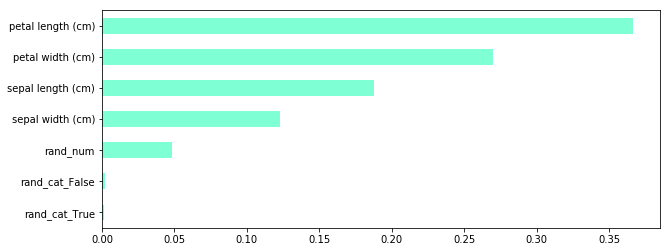

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# トレーニングデータをテストデータに分解
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# 学習
clf = RandomForestClassifier(n_estimators=20, random_state=42)
clf.fit(x_train, y_train)

#予測データ作成
y_predict = clf.predict(x_train)

#正解率の算出（今回は予測ではないので重要ではない）
accuracy_score(y_train, y_predict) 

# 特徴量重要を抽出
feature_importance = clf.feature_importances_

# pandas.Dataframeへ変換して可視化
feature_importance = pd.Series(feature_importance,index=feature_name)

feature_importance.sort_values().plot(kind='barh', figsize=(10, 4), color='aquamarine')